# **Translation**

In [6]:
!wget "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/05161950/Golden-Retriever-Slide-11.jpg"

--2021-09-01 06:21:28--  https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/05161950/Golden-Retriever-Slide-11.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.134.104
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.134.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78833 (77K) [image/jpeg]
Saving to: ‘Golden-Retriever-Slide-11.jpg’

Golden-Retriever-Sl 100%[===================>]  76.99K  --.-KB/s    in 0.1s    

2021-09-01 06:21:29 (579 KB/s) - ‘Golden-Retriever-Slide-11.jpg’ saved [78833/78833]



In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import argparse

In [13]:
def plt_imshow(title,image):
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.show()
  plt.grid(False)
  plt.axis("On")
  plt.title(title)
  plt.imshow(image)


In [10]:
args={
    "image":"Golden-Retriever-Slide-11.jpg"
}

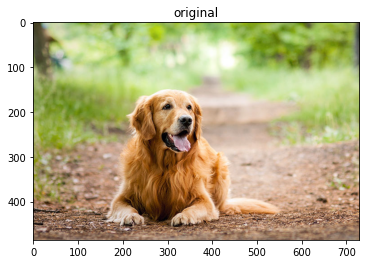

In [14]:
image=cv2.imread(args["image"])
plt_imshow("original",image)

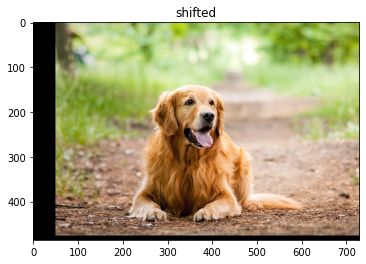

In [18]:
shift=imutils.translate(image,50,-10)
plt_imshow("shifted",shift)

In [19]:
h=image.shape[0]
w=image.shape[1]
channel=image.shape[2]
print(h,w,channel)

486 729 3


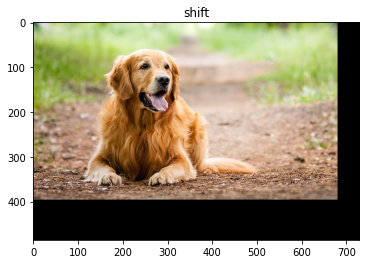

In [24]:
(cx,cy)=(h//2,w//2)
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted=cv2.warpAffine(image,M,(w,h))
plt_imshow("shift",shifted)

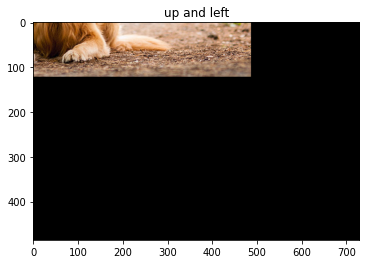

In [28]:
M = np.float32([[1, 0, -cx], [0, 1, -cy]])
shifted=cv2.warpAffine(image,M,(w,h))
plt_imshow("up and left",shifted)

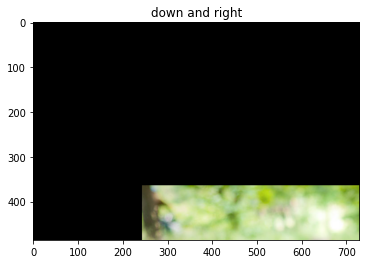

In [30]:
M = np.float32([[1, 0, cx], [0, 1, cy]])
shifted=cv2.warpAffine(image,M,(w,h))
plt_imshow("down and right",shifted)

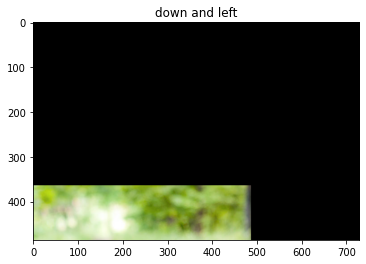

In [32]:
M = np.float32([[1, 0, -cx], [0, 1, cy]])
shifted=cv2.warpAffine(image,M,(w,h))
plt_imshow("down and left",shifted)

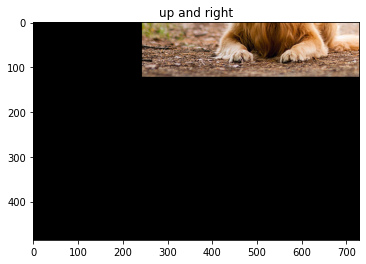

In [33]:
M = np.float32([[1, 0, cx], [0, 1, -cy]])
shifted=cv2.warpAffine(image,M,(w,h))
plt_imshow("up and right",shifted)

# **Rotation**

In [42]:
(h,w)=image.shape[:2]
(cx,cy)=(w//2,h//2)

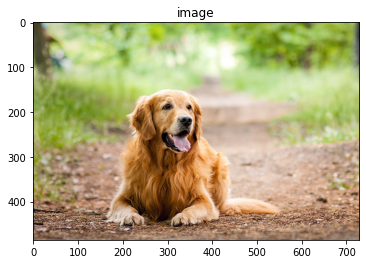

In [44]:
plt_imshow("image",image)

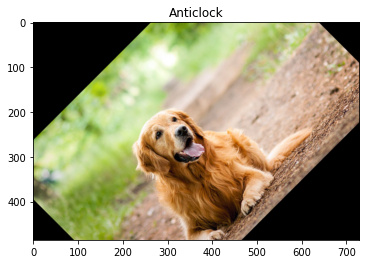

In [48]:
M = cv2.getRotationMatrix2D((cx, cy), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Anticlock", rotated)

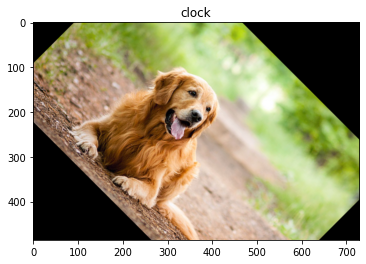

In [49]:
M = cv2.getRotationMatrix2D((cx, cy), -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("clock", rotated)

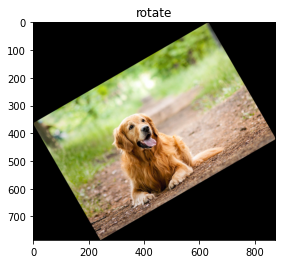

In [47]:
rotate=imutils.rotate_bound(image,-30)
plt_imshow("rotate",rotate)

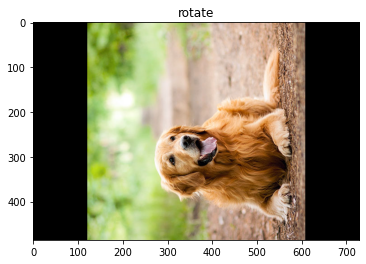

In [51]:
rotate=imutils.rotate(image,90)
plt_imshow("rotate",rotate)

# **Cropping**

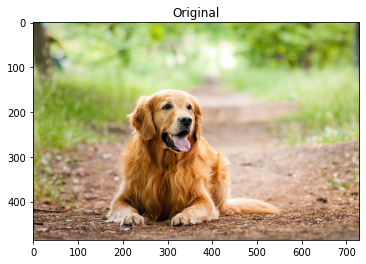

In [52]:
plt_imshow("Original",image)

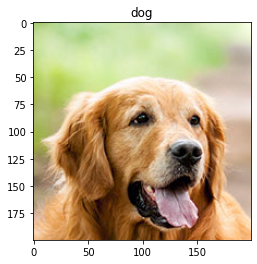

In [55]:
face=image[100:300, 200:400]
plt_imshow("dog",face)

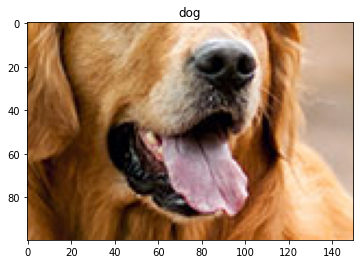

In [56]:
nose =image[200:300, 250:400]
plt_imshow("dog",nose)

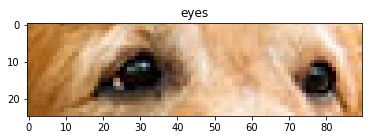

In [58]:
eyes =face[75:100, 70:160]
plt_imshow("eyes",eyes)

# **Flipping**

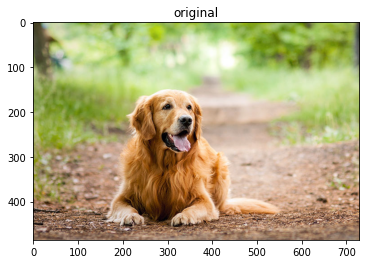

In [59]:
plt_imshow("original",image)

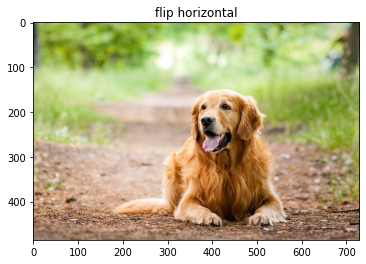

In [63]:
flipped=cv2.flip(image,1)
plt_imshow("flip horizontal",flipped)

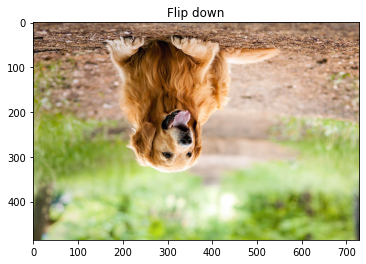

In [64]:
flipped=cv2.flip(image,0)
plt_imshow("Flip down",flipped)

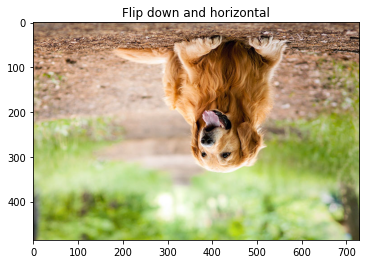

In [66]:
flipped=cv2.flip(image,-1)
plt_imshow("Flip down and horizontal",flipped)

# **Resizing**

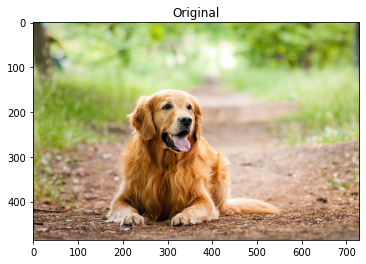

In [68]:
plt_imshow("Original",image)

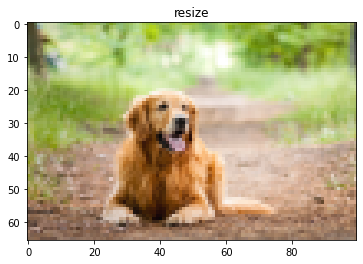

In [69]:
resize=imutils.resize(image,width=100)
plt_imshow("resize",resize)

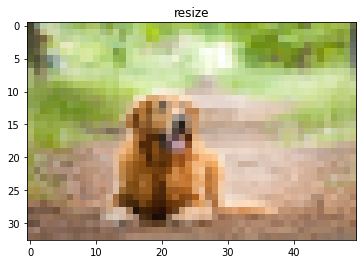

In [73]:
resize=imutils.resize(image,width=50, height=10)
plt_imshow("resize",resize)

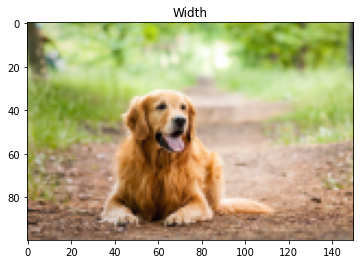

In [74]:
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Width", resized)

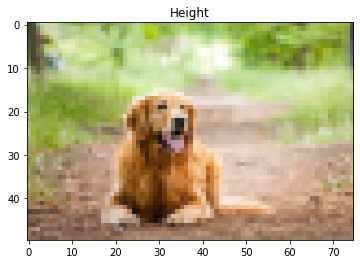

In [75]:
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Height", resized)